<a href="https://colab.research.google.com/github/xhavien/CCMACLRL_EXERCISE/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)

In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [ ]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [ ]:

sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])

# Now you can select the dummy columns
df = df[['Survived', 'Age', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3']]

df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(['Survived'], axis=1) # Removed 'Ticket' from the list of columns to drop
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
model.score(x_test, y_test)

0.8321678321678322

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

0.7857480547621394

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[78,  7],
       [17, 41]])

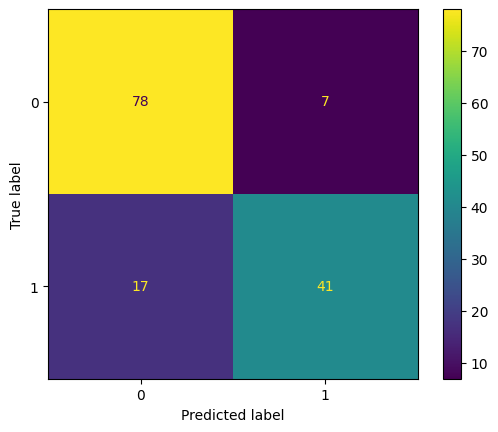

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        85
           1       0.85      0.71      0.77        58

    accuracy                           0.83       143
   macro avg       0.84      0.81      0.82       143
weighted avg       0.83      0.83      0.83       143



In [ ]:
from sklearn.metrics import accuracy_score # import the function

accuracy = accuracy_score(y_test, y_predicted) # use y_predicted
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.22%


In [ ]:
sf.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    int64  
 1   Age         714 non-null    float64
 2   Sex_female  714 non-null    bool   
 3   Sex_male    714 non-null    bool   
 4   Pclass_1    714 non-null    bool   
 5   Pclass_2    714 non-null    bool   
 6   Pclass_3    714 non-null    bool   
dtypes: bool(5), float64(1), int64(1)
memory usage: 20.2 KB


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
dt = pd.get_dummies(dt, columns=['Sex', 'Pclass'])
# dt = pd.get_dummies(df, columns=['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3'])
# dt.dropna(inplace=True)
dt.drop(columns=["Name", "PassengerId", "SibSp","Parch", "Ticket", "Embarked", "Fare", "Cabin"], axis=1, inplace=True)
dt.head()

,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,34.5,False,True,False,False,True
1,47.0,True,False,False,False,True
2,62.0,False,True,False,True,False
3,27.0,False,True,False,False,True
4,22.0,True,False,False,False,True


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         332 non-null    float64
 1   Sex_female  418 non-null    bool   
 2   Sex_male    418 non-null    bool   
 3   Pclass_1    418 non-null    bool   
 4   Pclass_2    418 non-null    bool   
 5   Pclass_3    418 non-null    bool   
dtypes: bool(5), float64(1)
memory usage: 5.4 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    int64  
 1   Age         714 non-null    float64
 2   Sex_female  714 non-null    bool   
 3   Sex_male    714 non-null    bool   
 4   Pclass_1    714 non-null    bool   
 5   Pclass_2    714 non-null    bool   
 6   Pclass_3    714 non-null    bool   
dtypes: bool(5), float64(1), int64(1)
memory usage: 20.2 KB


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         332 non-null    float64
 1   Sex_female  418 non-null    bool   
 2   Sex_male    418 non-null    bool   
 3   Pclass_1    418 non-null    bool   
 4   Pclass_2    418 non-null    bool   
 5   Pclass_3    418 non-null    bool   
dtypes: bool(5), float64(1)
memory usage: 5.4 KB


In [ ]:
dt.sample(10)

,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
217,57.0,False,True,True,False,False
69,60.0,True,False,True,False,False
109,18.5,False,True,False,True,False
157,23.0,True,False,False,False,True
10,NaN,False,True,False,False,True
77,55.0,True,False,True,False,False
292,NaN,False,True,False,False,True
99,33.0,False,True,False,False,True
291,30.0,True,False,False,False,True
289,NaN,False,True,False,False,True


In [ ]:
dt.fillna(0, inplace=True)

In [ ]:
id = sf.pop('PassengerId')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerID': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")


Submission file created: submission_file.csv
